In [1]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import sklearn 
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
random.seed(0)

In [183]:
Total = []
for root, dirs, files in os.walk("./"):
    for file in files:
        if file.endswith('.wav'):
            Total.append(file)
name = []
for i in Total:
    name.append(i[:4])

unique = []
before_after = []
for i in Total:
    if np.sum((np.array(name, dtype = int) == int(i[:4]))) == 1:
        unique.append(i)
    else:
        before_after.append(i) 

Asthmatic_Female = []
Asthmatic_Male = []
Healthy_Male = []
Healthy_Female = []
for file in unique:
    if file.endswith('.wav'):
        if file.find('sthma') !=-1:
            if file.find("_M_")!=-1:
                Asthmatic_Male.append(file)
            if file.find("_F_")!=-1:
                Asthmatic_Female.append(file)
        if file.find("_C_")!=-1:
            if file.find("_M_")!=-1:
                Healthy_Male.append(file)
            if file.find("_F_")!=-1:
                Healthy_Female.append(file)
    
                


In [162]:
def train_test_cross_validation_set(Asthmatic_Female, Asthmatic_Male, Healthy_Female, Healthy_Male, before_after):
    Asthmatic_Female = shuffle(Asthmatic_Female)
    Asthmatic_Male = shuffle(Asthmatic_Male)
    Healthy_Female = shuffle(Healthy_Female)
    Healthy_Male = shuffle(Healthy_Male)
    cross_validation_set = np.concatenate((Asthmatic_Male[:7], Asthmatic_Female[:7], Healthy_Male[:7], Healthy_Female[:7]))
    test_set = np.concatenate((Asthmatic_Male[7:14], Asthmatic_Female[7:14], Healthy_Male[7:14], Healthy_Female[7:14]))

    train_set = np.concatenate((np.array(Asthmatic_Male),
                                np.array(Asthmatic_Female),
                                np.array(Healthy_Male),
                                np.array(Healthy_Female)))
    train_set = np.setdiff1d(train_set,test_set)
    train_set = np.setdiff1d(train_set,cross_validation_set)
#     np.array(before_after).shape
    train_set = np.concatenate((train_set, np.array(before_after)))
    return train_set, cross_validation_set, test_set

In [75]:
Cough_dataframe = pd.read_csv("./MFCCs_stasts_Csv/Cough.csv")
Wheeze_dataframe = pd.read_csv("./MFCCs_stasts_Csv/Wheeze.csv")

In [209]:
# train_test Csv
def train_test_crossval_csv(sound_dataframe, Asthmatic_Female, Asthmatic_Male, Healthy_Female, Healthy_Male, before_after):
    Train, cross_val, Test = train_test_cross_validation_set(Asthmatic_Female, Asthmatic_Male, Healthy_Female, Healthy_Male, before_after)     

    test_dataframe = pd.DataFrame()
    for i, line in enumerate(Test):
        A = sound_dataframe[(sound_dataframe['73'] == (Test[i]))]
        test_dataframe = pd.DataFrame.append(test_dataframe,A)
        
    crossval_dataframe = pd.DataFrame()
    for i, line in enumerate(cross_val):
        A = sound_dataframe[(sound_dataframe['73'] == (cross_val[i]))]
        crossval_dataframe = pd.DataFrame.append(crossval_dataframe,A)
        
        
    train_dataframe = pd.DataFrame()
    for i, line in enumerate(Train):
        A = sound_dataframe[(sound_dataframe['73'] == (Train[i]))]
        train_dataframe = pd.DataFrame.append(train_dataframe,A) 
        
        
    
    return shuffle(train_dataframe), shuffle(crossval_dataframe), shuffle(test_dataframe)

# Wheeze

In [210]:
Total = np.unique(Wheeze_dataframe.iloc[:,73])


name = []
for i in Total:
    name.append(i[:4])

unique = []
before_after = []
for i in Total:
    if np.sum((np.array(name, dtype = int) == int(i[:4]))) == 1:
        unique.append(i)
    else:
        before_after.append(i) 

Asthmatic_Female = []
Asthmatic_Male = []
Healthy_Male = []
Healthy_Female = []
for file in unique:
    if file.find('sthma') !=-1:
        if file.find("_M_")!=-1:
            Asthmatic_Male.append(file)
        if file.find("_F_")!=-1:
            Asthmatic_Female.append(file)
    if file.find("_C_")!=-1:
        if file.find("_M_")!=-1:
            Healthy_Male.append(file)
        if file.find("_F_")!=-1:
            Healthy_Female.append(file)

Total = 188 
Female = 80
Male = 102
Asthmatic_Female = 46
Asthmatic_Male = 60
Healthy_Female = 34
Healthy_Male = 42

### Training set
Female/male ratio = 
Asthmatic/Non_Astmatic =
Asthmatic_Female/Asthmatic_Male = 

### Test Set 
Female/male Ratio
Asthmatic/

In [ ]:
# for i in range(0,10):
#     train_csv, cross_csv, test_csv = train_test_crossval_csv(Wheeze_dataframe, Asthmatic_Female, Asthmatic_Male, Healthy_Female, Healthy_Male, before_after)
#     train_csv.to_csv('./Wheeze_sets/train'+str(i)+'.csv', index=False)
#     test_csv.to_csv('./Wheeze_sets/test'+str(i)+'.csv', index=False)
#     cross_csv.to_csv('./Wheeze_sets/cross'+str(i)+'.csv', index=False)
    

In [221]:
model = XGBClassifier(max_deapth = 4,
                     subsample = 0.8,
                     learning_rate = 0.01,
                     n_estimators = 250,
                     min_child_weight = 2)

In [222]:
test = []
train = []
cross_val = []
for i in range(0,10):
    train_csv, crossval_csv, test_csv = pd.read_csv('./Wheeze_sets/train'+ str(i) + '.csv'), pd.read_csv('./Wheeze_sets/cross'+ str(i) + '.csv'), pd.read_csv('./Wheeze_sets/test'+ str(i) + '.csv')
    X_train = train_csv.iloc[:,:72]
    y_train = train_csv.iloc[:,72]
    X_crossval = crossval_csv.iloc[:,:72]
    y_crossval = crossval_csv.iloc[:,72]
    X_test = test_csv.iloc[:,:72]
    y_test = test_csv.iloc[:,72]
    #Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_crossval = scaler.transform(X_crossval)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train)
    X_crossval = pd.DataFrame(X_crossval)
    X_test = pd.DataFrame(X_test)
    
    model.fit(X_train,y_train)
    test.append(metrics.accuracy_score(y_test,model.predict(X_test)))
    cross_val.append(metrics.accuracy_score(y_crossval,model.predict(X_crossval)))
    train.append(metrics.accuracy_score(y_train,model.predict(X_train)))

    
    
test.append(np.mean(test))
test.append(np.std(test[:10]))

train.append(np.mean(train))
train.append(np.std(train[:10]))

cross_val.append(np.mean(cross_val))
cross_val.append(np.std(cross_val[:10]))




[15:43:40] WARNING: ../src/learner.cc:541: 
Parameters: { max_deapth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:43:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:41] WARNING: ../src/learner.cc:541: 
Parameters: { max_deapth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:43:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evalu

In [223]:
pd.DataFrame(np.concatenate((np.array(train).reshape(12,1),np.array(cross_val).reshape(12,1), np.array(test).reshape(12,1)), axis = 1), index=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10', 'Mean', 'STD'], columns=['Train', 'Cross_val', 'Test'])

,Train,Cross_val,Test
Fold1,0.986726,0.766234,0.888889
Fold2,0.984726,0.824701,0.807229
Fold3,0.997396,0.782051,0.740088
Fold4,0.986523,0.857708,0.842105
Fold5,0.991150,0.958333,0.867580
Fold6,0.989474,0.843373,0.816964
Fold7,0.990317,0.905172,0.791837
Fold8,0.991228,0.818182,0.818182
Fold9,0.989343,0.866935,0.941423
Fold10,0.986655,0.912548,0.871681


### XGB

In [7]:
# import pickle
# filename = 'XGB_model.model'
# # pickle.dump(model, open(filename, 'wb'))
# # train_csv.to_csv('./Train_XGB.csv', index=False)
# # test_csv.to_csv('./Test_XGB.csv', index=False)
# # crossval_csv.to_csv('./Cross_XGB.csv', index = False)

# # load the model from disk
# model = pickle.load(open(filename, 'rb'))
# result = model.score(X_test, y_test)
# print(result)

0.8647342995169082


In [11]:
model = XGBClassifier(max_deapth = 5,
                     subsample = 0.8,
                     learning_rate = 0.01,
                     n_estimators = 250,
                     min_child_weight = 2)

In [8]:
# eval_set = [(X_train, y_train), (X_crossval, y_crossval), (X_test, y_test)]
eval_set = [(X_train, y_train), (X_crossval, y_crossval), (X_test,y_test)]
eval_metric = ["auc","error","logloss"]
model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)
# model.fit(X_train, y_train)

[01:06:39] WARNING: ../src/learner.cc:541: 
Parameters: { max_deapth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.96421	validation_0-error:0.09246	validation_0-logloss:0.68589	validation_1-auc:0.94595	validation_1-error:0.10638	validation_1-logloss:0.68627	validation_2-auc:0.87787	validation_2-error:0.15459	validation_2-logloss:0.68729
[1]	validation_0-auc:0.98320	validation_0-error:0.06614	validation_0-logloss:0.67889	validation_1-auc:0.97735	validation_1-error:0.08511	validation_1-logloss:0.67977	validation_2-auc:0.88590	validation_2-error:0.15459	validation_2-logloss:0.68241
[2]	validation_0-auc:0.98732	validation_0-error:0.05477	validation_0-logloss:0.67187	validation_1-auc:0.97977	validation_1-error:0.10638	validation_1-logloss:0.67305	validation

/home/akansh/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[5]	validation_0-auc:0.99037	validation_0-error:0.04552	validation_0-logloss:0.65136	validation_1-auc:0.98430	validation_1-error:0.08511	validation_1-logloss:0.65493	validation_2-auc:0.92409	validation_2-error:0.15459	validation_2-logloss:0.66103
[6]	validation_0-auc:0.99064	validation_0-error:0.04196	validation_0-logloss:0.64487	validation_1-auc:0.98188	validation_1-error:0.08511	validation_1-logloss:0.64929	validation_2-auc:0.92493	validation_2-error:0.14976	validation_2-logloss:0.65569
[7]	validation_0-auc:0.99126	validation_0-error:0.04481	validation_0-logloss:0.63831	validation_1-auc:0.98712	validation_1-error:0.09929	validation_1-logloss:0.64295	validation_2-auc:0.92493	validation_2-error:0.13527	validation_2-logloss:0.65060
[8]	validation_0-auc:0.99184	validation_0-error:0.04623	validation_0-logloss:0.63184	validation_1-auc:0.98712	validation_1-error:0.09220	validation_1-logloss:0.63722	validation_2-auc:0.92208	validation_2-error:0.14010	validation_2-logloss:0.64556
[9]	validati

[39]	validation_0-auc:0.99476	validation_0-error:0.03698	validation_0-logloss:0.47416	validation_1-auc:0.99316	validation_1-error:0.06383	validation_1-logloss:0.49434	validation_2-auc:0.91900	validation_2-error:0.13527	validation_2-logloss:0.53115
[40]	validation_0-auc:0.99473	validation_0-error:0.03627	validation_0-logloss:0.47016	validation_1-auc:0.99396	validation_1-error:0.06383	validation_1-logloss:0.49040	validation_2-auc:0.92003	validation_2-error:0.13527	validation_2-logloss:0.52855
[41]	validation_0-auc:0.99483	validation_0-error:0.03627	validation_0-logloss:0.46617	validation_1-auc:0.99477	validation_1-error:0.06383	validation_1-logloss:0.48687	validation_2-auc:0.91956	validation_2-error:0.13527	validation_2-logloss:0.52570
[42]	validation_0-auc:0.99504	validation_0-error:0.03556	validation_0-logloss:0.46195	validation_1-auc:0.99517	validation_1-error:0.06383	validation_1-logloss:0.48284	validation_2-auc:0.92124	validation_2-error:0.13527	validation_2-logloss:0.52214
[43]	val

[73]	validation_0-auc:0.99715	validation_0-error:0.02703	validation_0-logloss:0.35916	validation_1-auc:0.99940	validation_1-error:0.05674	validation_1-logloss:0.38540	validation_2-auc:0.92376	validation_2-error:0.13527	validation_2-logloss:0.45597
[74]	validation_0-auc:0.99719	validation_0-error:0.02774	validation_0-logloss:0.35637	validation_1-auc:0.99980	validation_1-error:0.05674	validation_1-logloss:0.38266	validation_2-auc:0.92404	validation_2-error:0.13527	validation_2-logloss:0.45445
[75]	validation_0-auc:0.99718	validation_0-error:0.02845	validation_0-logloss:0.35359	validation_1-auc:0.99980	validation_1-error:0.05674	validation_1-logloss:0.37955	validation_2-auc:0.92395	validation_2-error:0.13527	validation_2-logloss:0.45280
[76]	validation_0-auc:0.99719	validation_0-error:0.02916	validation_0-logloss:0.35093	validation_1-auc:0.99980	validation_1-error:0.05674	validation_1-logloss:0.37685	validation_2-auc:0.92460	validation_2-error:0.13527	validation_2-logloss:0.45066
[77]	val

[107]	validation_0-auc:0.99819	validation_0-error:0.01778	validation_0-logloss:0.28089	validation_1-auc:1.00000	validation_1-error:0.02128	validation_1-logloss:0.30860	validation_2-auc:0.92717	validation_2-error:0.13527	validation_2-logloss:0.41717
[108]	validation_0-auc:0.99818	validation_0-error:0.01778	validation_0-logloss:0.27898	validation_1-auc:1.00000	validation_1-error:0.02128	validation_1-logloss:0.30676	validation_2-auc:0.92680	validation_2-error:0.13527	validation_2-logloss:0.41622
[109]	validation_0-auc:0.99824	validation_0-error:0.01778	validation_0-logloss:0.27716	validation_1-auc:1.00000	validation_1-error:0.02128	validation_1-logloss:0.30474	validation_2-auc:0.92638	validation_2-error:0.13527	validation_2-logloss:0.41564
[110]	validation_0-auc:0.99822	validation_0-error:0.01707	validation_0-logloss:0.27517	validation_1-auc:1.00000	validation_1-error:0.02128	validation_1-logloss:0.30269	validation_2-auc:0.92754	validation_2-error:0.13527	validation_2-logloss:0.41435
[111

[140]	validation_0-auc:0.99891	validation_0-error:0.01280	validation_0-logloss:0.22602	validation_1-auc:1.00000	validation_1-error:0.01418	validation_1-logloss:0.25336	validation_2-auc:0.92288	validation_2-error:0.13527	validation_2-logloss:0.39679
[141]	validation_0-auc:0.99891	validation_0-error:0.01280	validation_0-logloss:0.22458	validation_1-auc:1.00000	validation_1-error:0.01418	validation_1-logloss:0.25191	validation_2-auc:0.92306	validation_2-error:0.13527	validation_2-logloss:0.39599
[142]	validation_0-auc:0.99891	validation_0-error:0.01280	validation_0-logloss:0.22318	validation_1-auc:1.00000	validation_1-error:0.01418	validation_1-logloss:0.25049	validation_2-auc:0.92288	validation_2-error:0.13527	validation_2-logloss:0.39530
[143]	validation_0-auc:0.99893	validation_0-error:0.01280	validation_0-logloss:0.22188	validation_1-auc:1.00000	validation_1-error:0.01418	validation_1-logloss:0.24944	validation_2-auc:0.92316	validation_2-error:0.13527	validation_2-logloss:0.39466
[144

[173]	validation_0-auc:0.99931	validation_0-error:0.01067	validation_0-logloss:0.18535	validation_1-auc:1.00000	validation_1-error:0.01418	validation_1-logloss:0.21255	validation_2-auc:0.92689	validation_2-error:0.13527	validation_2-logloss:0.38294
[174]	validation_0-auc:0.99930	validation_0-error:0.01067	validation_0-logloss:0.18431	validation_1-auc:1.00000	validation_1-error:0.01418	validation_1-logloss:0.21148	validation_2-auc:0.92708	validation_2-error:0.13527	validation_2-logloss:0.38249
[175]	validation_0-auc:0.99931	validation_0-error:0.01067	validation_0-logloss:0.18319	validation_1-auc:1.00000	validation_1-error:0.00709	validation_1-logloss:0.21034	validation_2-auc:0.92689	validation_2-error:0.13527	validation_2-logloss:0.38225
[176]	validation_0-auc:0.99932	validation_0-error:0.01138	validation_0-logloss:0.18215	validation_1-auc:1.00000	validation_1-error:0.01418	validation_1-logloss:0.20938	validation_2-auc:0.92689	validation_2-error:0.13527	validation_2-logloss:0.38193
[177

[206]	validation_0-auc:0.99949	validation_0-error:0.00782	validation_0-logloss:0.15479	validation_1-auc:1.00000	validation_1-error:0.00709	validation_1-logloss:0.17958	validation_2-auc:0.92577	validation_2-error:0.13527	validation_2-logloss:0.37902
[207]	validation_0-auc:0.99950	validation_0-error:0.00782	validation_0-logloss:0.15402	validation_1-auc:1.00000	validation_1-error:0.00709	validation_1-logloss:0.17872	validation_2-auc:0.92661	validation_2-error:0.13527	validation_2-logloss:0.37893
[208]	validation_0-auc:0.99951	validation_0-error:0.00782	validation_0-logloss:0.15317	validation_1-auc:1.00000	validation_1-error:0.00709	validation_1-logloss:0.17772	validation_2-auc:0.92605	validation_2-error:0.13527	validation_2-logloss:0.37891
[209]	validation_0-auc:0.99951	validation_0-error:0.00782	validation_0-logloss:0.15236	validation_1-auc:1.00000	validation_1-error:0.00709	validation_1-logloss:0.17683	validation_2-auc:0.92633	validation_2-error:0.13527	validation_2-logloss:0.37918
[210

[239]	validation_0-auc:0.99967	validation_0-error:0.00711	validation_0-logloss:0.13156	validation_1-auc:1.00000	validation_1-error:0.00709	validation_1-logloss:0.15311	validation_2-auc:0.92605	validation_2-error:0.13527	validation_2-logloss:0.38134
[240]	validation_0-auc:0.99969	validation_0-error:0.00711	validation_0-logloss:0.13092	validation_1-auc:1.00000	validation_1-error:0.00709	validation_1-logloss:0.15228	validation_2-auc:0.92652	validation_2-error:0.13527	validation_2-logloss:0.38090
[241]	validation_0-auc:0.99969	validation_0-error:0.00640	validation_0-logloss:0.13029	validation_1-auc:1.00000	validation_1-error:0.00709	validation_1-logloss:0.15179	validation_2-auc:0.92661	validation_2-error:0.13527	validation_2-logloss:0.38077
[242]	validation_0-auc:0.99969	validation_0-error:0.00640	validation_0-logloss:0.12969	validation_1-auc:1.00000	validation_1-error:0.00709	validation_1-logloss:0.15101	validation_2-auc:0.92670	validation_2-error:0.13527	validation_2-logloss:0.38088
[243

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.01, max_deapth=5, max_delta_step=0, max_depth=6,
       min_child_weight=2, missing=nan, monotone_constraints='()',
       n_estimators=250, n_jobs=8, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.8,
       tree_method='exact', use_label_encoder=True, validate_parameters=1,
       verbosity=None)

Text(0.5, 0, 'epocs')

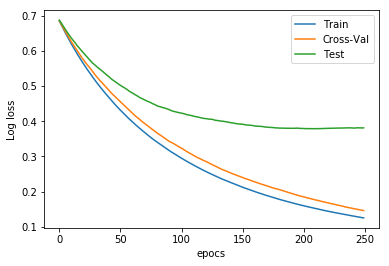

In [9]:
result = model.evals_result_
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
plt.plot(x_axis,results['validation_0']['logloss'],label='Train')
plt.plot(x_axis,results['validation_1']['logloss'],label='Cross-Val')
plt.plot(x_axis,results['validation_2']['logloss'],label='Test')
plt.legend()
plt.ylabel('Log loss')
plt.xlabel('epocs')

Text(0.5, 0, 'epocs')

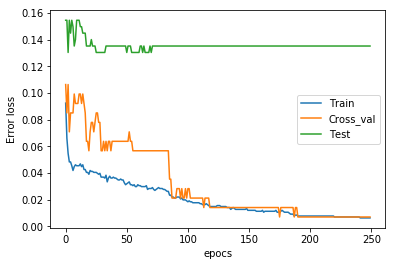

In [10]:
x_axis = range(0, epochs)
plt.plot(x_axis,results['validation_0']['error'],label='Train')
plt.plot(x_axis,results['validation_1']['error'],label='Cross_val')
plt.plot(x_axis,results['validation_2']['error'],label='Test')


plt.legend()
plt.ylabel('Error loss')
plt.xlabel('epocs')

Text(0.5, 0, 'epocs')

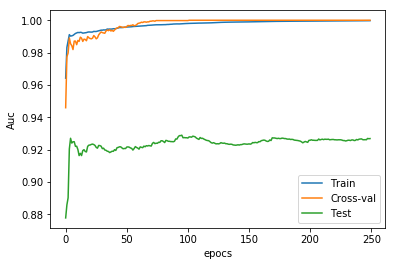

In [11]:
x_axis = range(0, epochs)
plt.plot(x_axis,results['validation_0']['auc'],label='Train')
plt.plot(x_axis,results['validation_1']['auc'],label='Cross-val')
plt.plot(x_axis,results['validation_2']['auc'],label='Test')

plt.legend()
plt.ylabel('Auc')
plt.xlabel('epocs')

In [91]:
print(model.score(X_train,y_train))
print(confusion_matrix(y_train,y_pred= model.predict(X_train)))

0.9979508196721312
[[560   1]
 [  2 901]]


In [92]:
print(model.score(X_crossval,y_crossval))
print(confusion_matrix(y_crossval,y_pred= model.predict(X_crossval)))

0.9700598802395209
[[93  5]
 [ 0 69]]


In [93]:
print(model.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred= model.predict(X_test)))

0.8993288590604027
[[69 12]
 [ 3 65]]


### Saving Model and CSV

In [41]:
# import pickle
# filename = 'XGB_model.model'
# pickle.dump(model, open(filename, 'wb'))
# train_csv.to_csv('./Train_XGB.csv', index=False)
# test_csv.to_csv('./Test_XGB.csv', index=False)
# crossval_csv.to_csv('./Cross_XGB.csv', index = False)

# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

### Random Forest 

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model = RandomForestClassifier()

In [41]:
# train_csv = pd.read_csv('./Train_XGB.csv')
# test_csv = pd.read_csv('./Test_XGB.csv')
# crossval_csv = pd.read_csv('./Cross_XGB.csv')
# X_train = train_csv.iloc[:,:72]
# y_train = train_csv.iloc[:,72]
# X_crossval = crossval_csv.iloc[:,:72]
# y_crossval = crossval_csv.iloc[:,72]
# X_test = test_csv.iloc[:,:72]
# y_test = test_csv.iloc[:,72]
# #Scaling
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_crossval = scaler.transform(X_crossval)
# X_test = scaler.transform(X_test)
# X_train = pd.DataFrame(X_train)
# X_crossval = pd.DataFrame(X_crossval)
# X_test = pd.DataFrame(X_test)

In [52]:
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_crossval,y_crossval))
print(model.score(X_test,y_test))

0.9993136582017845
0.9461077844311377
0.8205128205128205


### 10 Folds Random Forest

In [12]:
test = []
train = []
for i in range(0,10):
    train_csv, test_csv = train_test_csv(Wheeze_dataframe, Asthmatic_Female, Asthmatic_Male, Healthy_Female, Healthy_Male, before_after)
    X_train = train_csv.iloc[:,:72]
    y_train = train_csv.iloc[:,72]
    X_test = test_csv.iloc[:,:72]
    y_test = test_csv.iloc[:,72]
    #Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)

    model.fit(X_train,y_train)
    test.append(metrics.accuracy_score(y_test,model.predict(X_test)))

    train.append(metrics.accuracy_score(y_train,model.predict(X_train)))

NameError: name 'train_test_csv' is not defined

In [62]:
test.append(np.mean(test))
test.append(np.std(test[:10]))

In [63]:
pd.DataFrame(test, index=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10', 'Mean', 'STD'])

,0
Fold1,0.907801
Fold2,0.833333
Fold3,0.838235
Fold4,0.757812
Fold5,0.808642
Fold6,0.868020
Fold7,0.853659
Fold8,0.836879
Fold9,0.774834
Fold10,0.811966


### Logistic Regression

In [71]:
lrmodel = sklearn.linear_model.LogisticRegressionCV(max_iter=1000,penalty='l2',solver='liblinear', Cs= 10,cv=3 )

In [78]:
test = []
train = []
for i in range(0,5):
    train_csv, test_csv = train_test_csv(Wheeze_dataframe, Asthmatic_Female, Asthmatic_Male, Healthy_Female, Healthy_Male, before_after)
    X_train = train_csv.iloc[:,:72]
    y_train = train_csv.iloc[:,72]
    X_test = test_csv.iloc[:,:72]
    y_test = test_csv.iloc[:,72]
    #Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)

    lrmodel.fit(X_train,y_train)
    test.append(metrics.accuracy_score(y_test,lrmodel.predict(X_test)))

    train.append(metrics.accuracy_score(y_train,lrmodel.predict(X_train)))

In [79]:
print('Test:{}' .format(np.mean(test))),
print('Train:{}' .format(np.mean(train)))

Test:0.8201454864706245
Train:0.8851475897449081


In [ ]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test,  lrmodel.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1])

auc_logistic = auc(logistic_fpr, logistic_tpr)
auc_xgb = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGB (auc = %0.3f)' % auc_xgb)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()